**Problem 1 (50 pontos)**

Consider the following data and the third-order Lagrange function.

| $k$ | $t$ | $x(t)$ |
| --- |---|---|
| 1 | 1.0 | 5 |
| 2 | 2.5 | 6 |
| 3 | 3.0 | 3 |
| 4 | 4.5 | 1 |
| 5 | 6.0 | 2 |

In [13]:
# librarie
import numpy as np

# Given data
t_all = np.array([1.0, 2.5, 3.0, 4.5, 6.0], dtype=float)
x_all = np.array([5.0, 6.0, 3.0, 1.0, 2.0], dtype=float)

# Select nodes
def lagrange_basis(ts): # Lagrange basis polynomials
    n = len(ts) # number of nodes
    basis = [] # list of basis polynomials
    for k in range(n): # for each basis polynomial L_k
        Lk = np.poly1d([1.0]) # start with L_k = 1
        denom = 1.0 # denominator
        for j in range(n): # for each node t_j
            if j == k: # skip j = k
                continue # skip j = k
            Lk *= np.poly1d([1.0, -ts[j]])   # multiply by (t - t_j)
            denom *= (ts[k] - ts[j])         # product of (t_k - t_j)
        basis.append(Lk/denom) # append L_k(t) = product / denominator
    return basis

# Nodes sets
def lagrange_poly(ts, ys): # Lagrange polynomial
    basis = lagrange_basis(ts) # get basis polynomials
    P = np.poly1d([0.0]) # start with P = 0
    for Lk, yk in zip(basis, ys): # for each basis polynomial L_k and value y_k
        P += yk * Lk # add y_k * L_k to P
    return P, basis

def poly_coeffs(P, degree=3): # get polynomial coefficients
    c = np.poly1d(P).coef # get coefficients
    if len(c) < (degree+1): # if degree is less than required
        c = np.pad(c, (degree+1-len(c), 0), constant_values=0.0) # pad with zeros
    return c[:degree+1]

a) Find, mathematically, each of the constituent polynomials;

Since this is a third-order polynomial in $k$ = 5, only the most recent $s + 1$ = 4 samples ($k$ = 2, 3, 4, 5) are needed.


$$ L_i(t) = x_i \prod_{j=0,j\neq i}^s\frac{t-t_j}{t_i-t_j} $$

Calculating each polynomial,

$$
\begin{gathered}
L_{2.5}(t)= \frac{(t-3.0)(t-4.5)(t-6.0)}{(2.5-3.0)(2.5-4.5)(2.5-6.0)}= - \frac{2}{7}t^3 + \frac{27}{7}t^2 - \frac{117}{7}t + \frac{162}{7} = -0.2857t^3 - 3.8571t^2 - 16.7142t + 23.1428 \\\\
L_{3.0}(t)= \frac{(t-2.5)(t-4.5)(t-6.0)}{(3.0-2.5)(3.0-4.5)(3.0-6.0)}=\frac{4}{9}t^3 - \frac{52}{9}t^2 + \frac{71}{3}t - 30 = 0.4444t^3 - 5.7778t^2 + 23.6667t - 30 \\\\
L_{4.5}(t)= \frac{(t-2.5)(t-3.0)(t-6.0)}{(4.5-2.5)(4.5-3.0)(4.5-6.0)}= - \frac{2}{9}t^3 + \frac{23}{9}t^2 - 9t + 10 = -0.2222t^3 + 2.5555t^2 - 9t + 10 \\\\
L_{6.0}(t)= \frac{(t-2.5)(t-3.0)(t-4.5)}{(6.0-2.5)(6.0-3.0)(6.0-4.5)}=\frac{4}{63}t^3 - \frac{40}{63}t^2 + \frac{43}{12}t -\frac{15}{7} = 0.0634t^3 - 0.6349t^2 + 2.0476t - 2.1428 \\\\
\end{gathered}
$$

In [ ]:
# Routine to check Constituent polynomials
# Node sets (last 4 nodes)
idx_last4  = [1, 2, 3, 4]   # 2.5, 3.0, 4.5, 6.0

t_last4 = t_all[idx_last4] # 2.5, 3.0, 4.5, 6.0
x_last4 = x_all[idx_last4] # 6.0, 3.0, 1.0, 2.0

# Build basis lists
basis_last4  = lagrange_basis(t_last4) # basis for last 4 nodes

# Print basis in expanded power form
def print_basis(ts, basis, title):
    print(title)
    for k, Lk in enumerate(basis):
        c = poly_coeffs(Lk, degree=3)
        print(f"L_{k}(t) for nodes {list(ts)}:")
        print(f"  = ({c[0]: .4f}) t^3 + ({c[1]: .4f}) t^2 + ({c[2]: .4f}) t + ({c[3]: .4f})")
    print()

print_basis(t_last4,  basis_last4,  "Constituent polynomials for nodes [2.5, 3.0, 4.5, 6.0]")


Constituent polynomials for nodes [2.5, 3.0, 4.5, 6.0]
L_0(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = (-0.2857) t^3 + ( 3.8571) t^2 + (-16.7143) t + ( 23.1429)
L_1(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = ( 0.4444) t^3 + (-5.7778) t^2 + ( 23.6667) t + (-30.0000)
L_2(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = (-0.2222) t^3 + ( 2.5556) t^2 + (-9.0000) t + ( 10.0000)
L_3(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = ( 0.0635) t^3 + (-0.6349) t^2 + ( 2.0476) t + (-2.1429)



b) Find, mathematically, the Lagrange polynomial;

In [17]:
P_last4,  _ = lagrange_poly(t_last4,  x_last4)

c2 = poly_coeffs(P_last4,  degree=3)

print("P3 using nodes [2.5, 3.0, 4.5, 6.0]:")
print(f"P3(t) = ({c2[0]: .4f}) t^3 + ({c2[1]: .4f}) t^2 + ({c2[2]: .4f}) t + ({c2[3]: .4f})")

P3 using nodes [2.5, 3.0, 4.5, 6.0]:
P3(t) = (-0.4762) t^3 + ( 7.0952) t^2 + (-34.1905) t + ( 54.5714)


c) Compare the polynomials found with the results obtained using the Lagrange function.

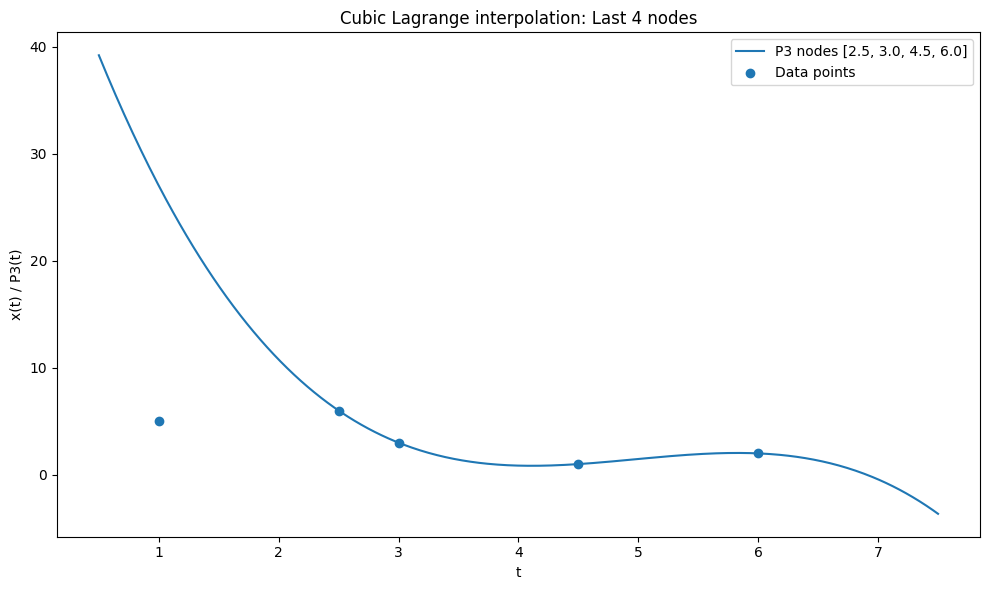

In [29]:
import matplotlib.pyplot as plt

# Plot
tt = np.linspace(t_all.min()-0.5, t_all.max()+1.5, 500)
y2 = np.poly1d(P_last4)(tt)

plt.figure(figsize=(10,6))
plt.plot(tt, y2, label="P3 nodes [2.5, 3.0, 4.5, 6.0]")
plt.scatter(t_all, x_all, label="Data points")
plt.xlabel("t")
plt.ylabel("x(t) / P3(t)")
plt.title("Cubic Lagrange interpolation: Last 4 nodes")
plt.legend()
plt.tight_layout()
plt.show()

d) Using the polynomial found, extrapolate an estimate of the function 
for t= 7. Analyze all the results found e provide the proper comments.

**Problem 2 (50 points)**

Consider the continuous signal x(t) = 2 cos(5t) + 7 sin(10t), which is 
sampled at a frequency of 20 samples per second. Assuming a granularity 
of h= 0.01 seconds:

a) Write a routine to extrapolate the signal with zero order holder.

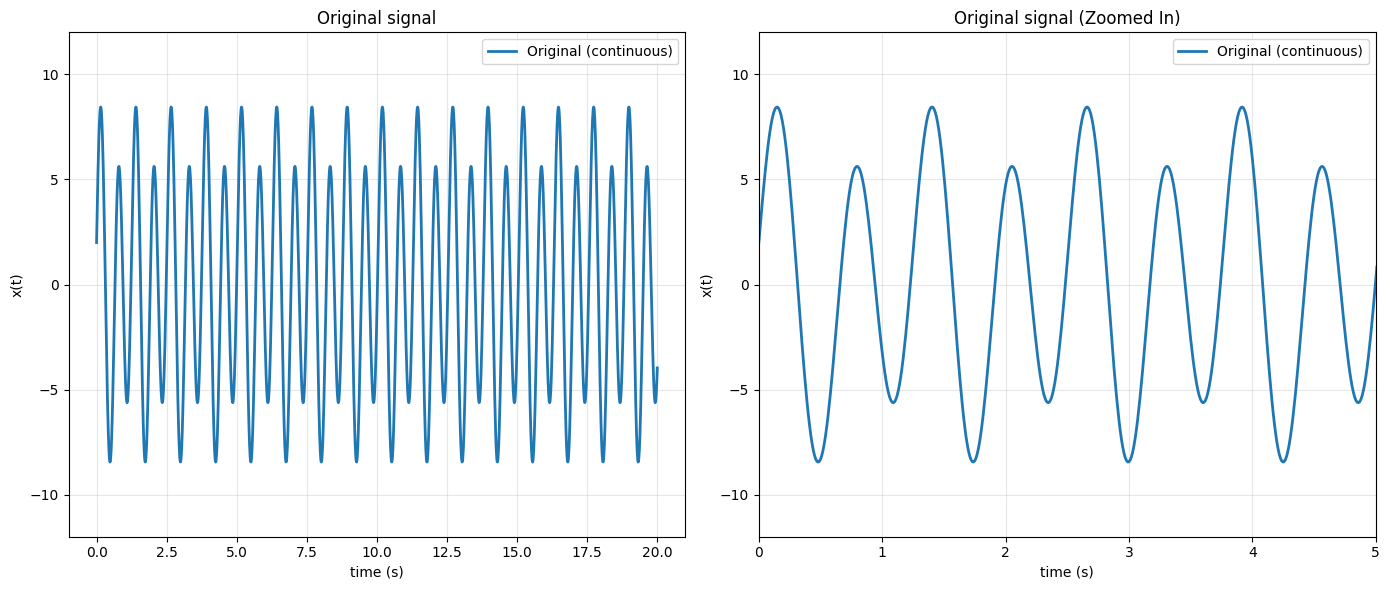

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous-time signal
def x_true(t):
    return 2*np.cos(5*t) + 7*np.sin(10*t) # original signal

fs = 20.0                  # samples per second
Ts = 1.0/fs                # sampling interval
h  = 0.01                  # granularity
T_end = 20.0               # total duration (seconds)

# Time grids
t_cont = np.arange(0.0, T_end + h, h)      # "continuous" grid for display
t_s    = np.arange(0.0, T_end + Ts, Ts)    # sampling instants

# Samples
x_s = x_true(t_s) # sampled signal
x_c = x_true(t_cont) # continuous signal for display

fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original signal")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original signal (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

b) Show the graph of the original signal and its zero-order approximation.

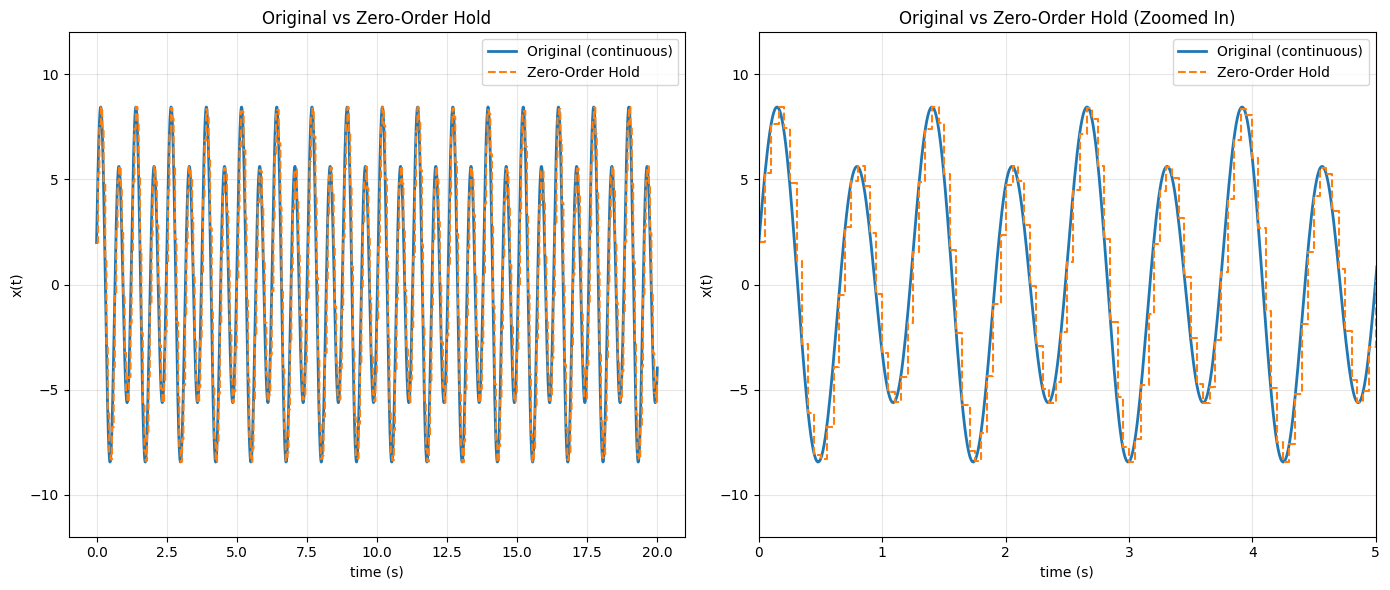

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Zero-Order Hold routine
def zoh_reconstruct(t_eval, t_samples, x_samples):
    idx = np.searchsorted(t_samples, t_eval, side="right") - 1
    idx = np.clip(idx, 0, len(x_samples)-1)
    return x_samples[idx]

x_zoh = zoh_reconstruct(t_cont, t_s, x_s)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original vs Zero-Order Hold")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original vs Zero-Order Hold (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

c) Show the graph of the original signal and its second-order approximation.

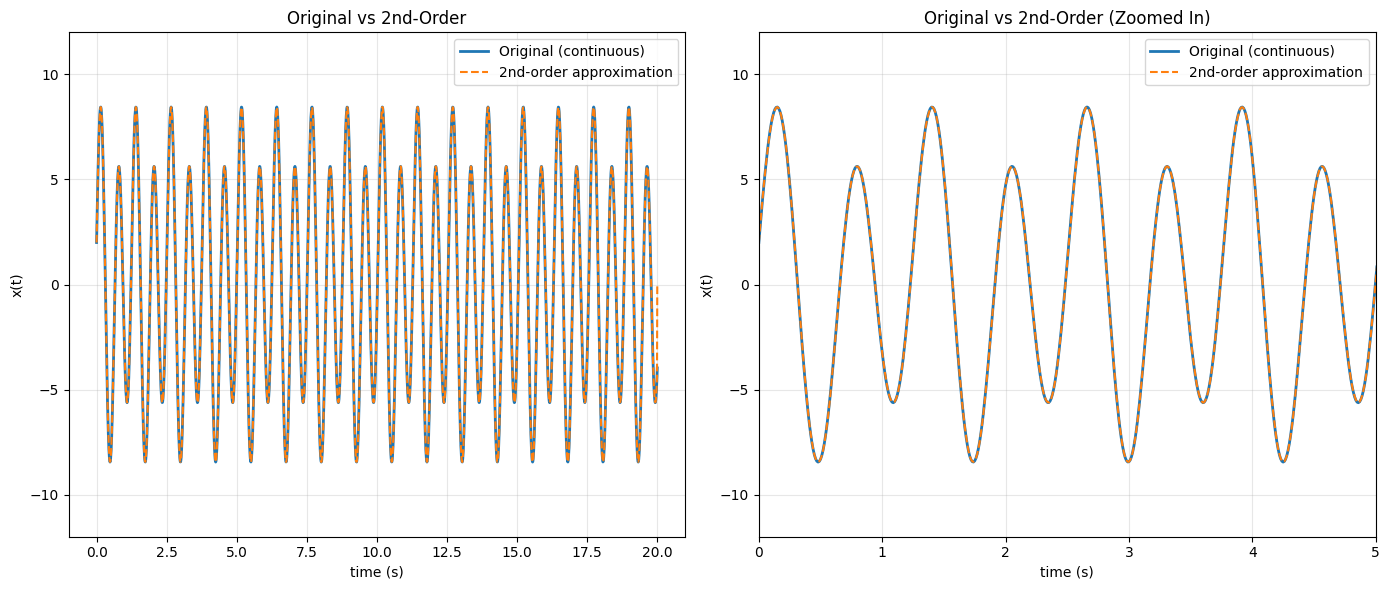

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# (c) 2nd-order (quadratic) approximation
def quad_local_reconstruct(t_eval, t_samples, x_samples):
    y = np.empty_like(t_eval, dtype=float)
    N = len(t_samples)

    # For last time point, include it in the last interval mask
    for i in range(N-1):
        if i < N-2:
            mask = (t_eval >= t_samples[i]) & (t_eval < t_samples[i+1])
        else:
            mask = (t_eval >= t_samples[i]) & (t_eval <= t_samples[i+1])

        if not np.any(mask):
            continue

        if i == 0:
            idxs = [0, 1, 2] if N >= 3 else list(range(min(3, N)))
        elif i == N-2:
            idxs = [N-3, N-2, N-1] if N >= 3 else list(range(max(0, N-3), N))
        else:
            idxs = [i-1, i, i+1]

        t_nodes = t_samples[idxs] # time nodes
        x_nodes = x_samples[idxs] # corresponding sample values

        # Fit quadratic and evaluate
        coeffs = np.polyfit(t_nodes, x_nodes, 2)  # degree 2
        y[mask] = np.polyval(coeffs, t_eval[mask]) #

    return y

x_quad = quad_local_reconstruct(t_cont, t_s, x_s)



fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].plot(t_cont, x_quad, label="2nd-order approximation", linestyle="--")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original vs 2nd-Order")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].plot(t_cont, x_quad, label="2nd-order approximation", linestyle="--")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original vs 2nd-Order (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

d) Analyze the results and provide the proper comments.

In [5]:
print("""
Because zero-order hold approximation adjusts each sample value until the next, it underrepresents intersample dynamics and can differ from\nthe original signal.\n\nIn contrast, a quadratic (2nd-order) approximation appears to better reflect the signal's curvature and substantially reduces error.""")


Because zero-order hold approximation adjusts each sample value until the next, it underrepresents intersample dynamics and can differ from
the original signal.

In contrast, a quadratic (2nd-order) approximation appears to better reflect the signal's curvature and substantially reduces error.
